# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
# !pip install pandas

And now we can import this package like so:

In [2]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Forage_virtual_internship/Cognizant_AI/eda/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


The `.info()` method creates a data description of the dataframe. it tells is the following;
- How many rows: 7829
- How many columns: 9
- Columns names
- How many values are non-null for each column
- The type of data contained within each column
- The size of the dataset loaded into the memory (~550KB)

It is also interesting to look at the datatypes. We can see that there are 3 different datatypes within the dataset;

- object = this column contains categorical values
- float64 = this columns contains float point numerial values (i.e decimal numbers)
- int64 = this column contains integer values (whole numbers)

Now let's compute some descriptive statistics of the numeric columns.

In [5]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The `.describe()` method computes some descriptive statistics of the numerical columns including;

- count = count of how many unique values exist (or how many entries)
- mena = mean average value of this column
- std = standard deviation
- min = minimum value 
- 25% = lower quartile value
- 50% = median value
- 75% = upper quartile value
- max = maximum value

Looking ath the distribution of the numerical data, the data is fairly distributed, and we may not have much of a skewed data. But this assunmption will be verified by visualising the data.

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
# !pip install seaborn

In [6]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [7]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

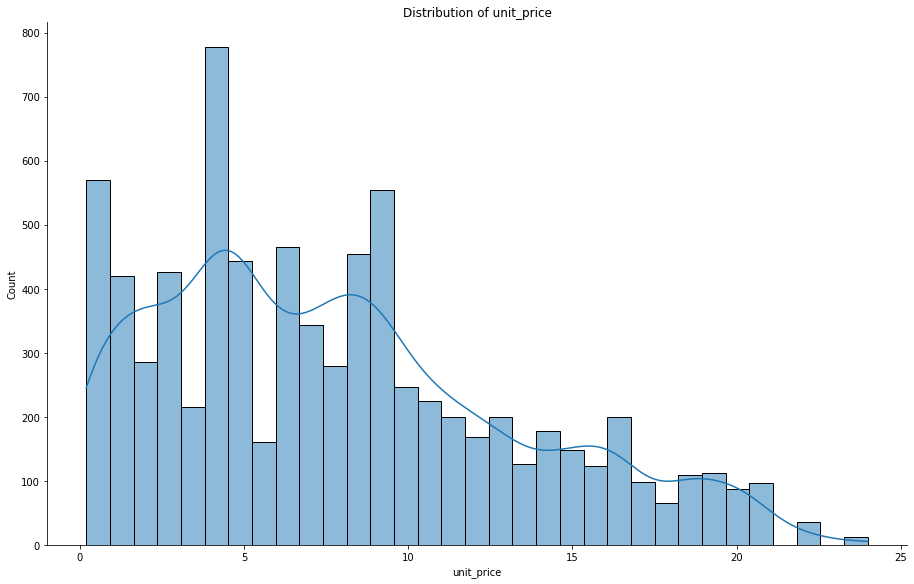

In [8]:
plot_continuous_distribution(df, 'unit_price')

This distribution plot show shows that the `unit_price` ispositively skewed, that is there are more sales of products with lower unit_price compared to products with a high unit_price.

This makes sense, you  would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.

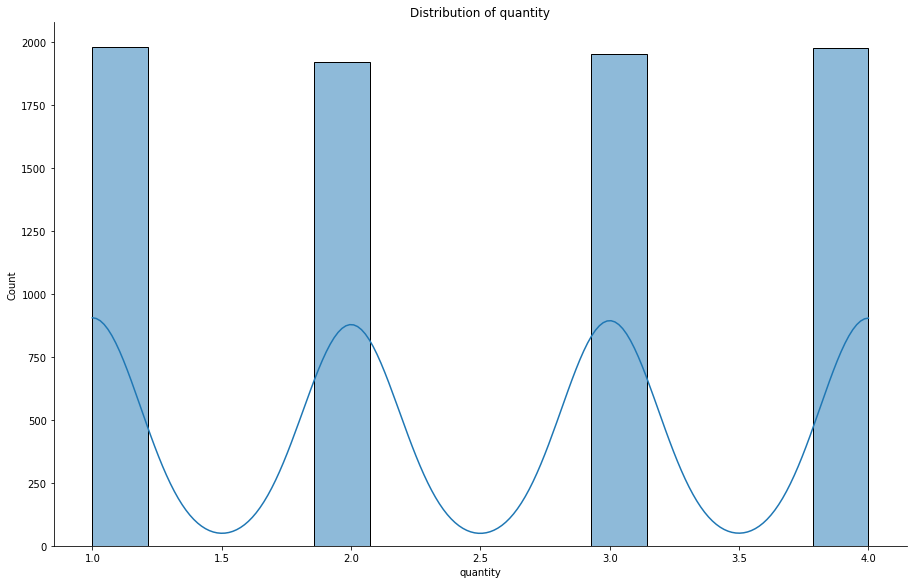

In [9]:
plot_continuous_distribution(df, 'quantity')

The distribution of `quantity` is different. We can see that only 4 unique values exit (1, 2, 3, and 4) and they are quite evenly distributed. This seems as though customers are buying even quantities across 1 to 4 units.

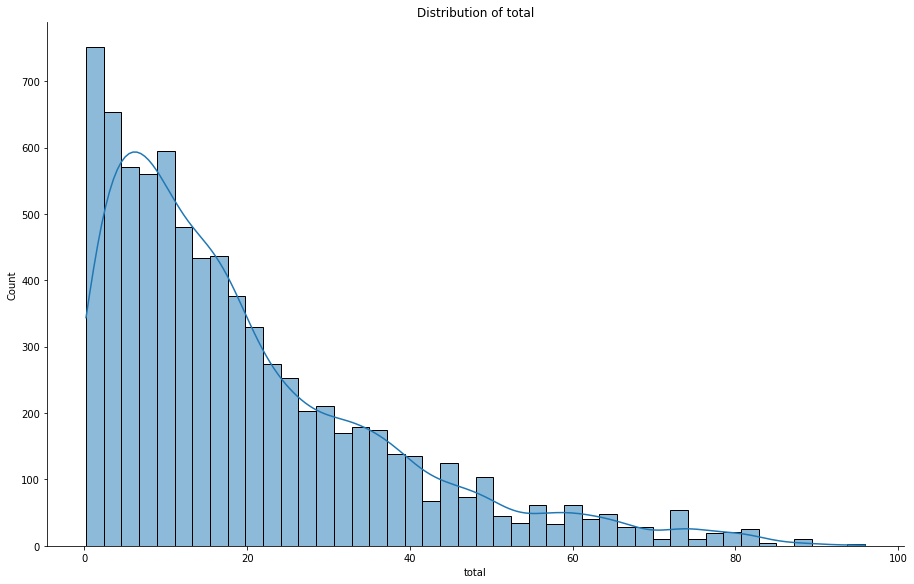

In [10]:
plot_continuous_distribution(df, 'total')

The `total` follows a similar distribution to `unit_price`. This may be expected, as the total is calculated as `unit_price * quantity`.

However, this distribution is even more positively skewed that the 'unit_price'. Once again, using intuition, this distribution makes sense. It is expected that customers at a grocery store will generally make more transactions of low value and  only occasionally make a transaction of a very high value.

Now lte's turn our attention to the categorical columns within the dataset.

Before visualising these columns, it is worht understanding how many unique values these columns have. If a categorical column has 1000's of unique values, it will be very dificult to visualise.

In [11]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


As explained previously, `transaction_id` is a unique ID column for each transaction. Since each row represents a unique transaction, this means that we have 7829 unique transaction IDs. Thereforem this column is not useful to visualise.

In [12]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


Similarly, `product_id` is an ID column, however it is unique based on the product that was sold within the transaction. From this computation, we can see that we have 300 unique product IDs, hence 300 unique products within the dataset. This is not worth visualising, but it certainly interesting to know. From the output of the helper function, we can see that the product most frequently was sold within this dataset was `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, sold 114 times during the week. Whereas the product least sold was `ec0bb9b5-45e3-4de8-963d-e92aa91a201e` sold just 3 times


In [13]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


There are 22 unique values for `category`, with `fruit` and `vegetables` being the 2 most frequently purchased product categories and `spices and herbs` being the least. Let's visualise this too

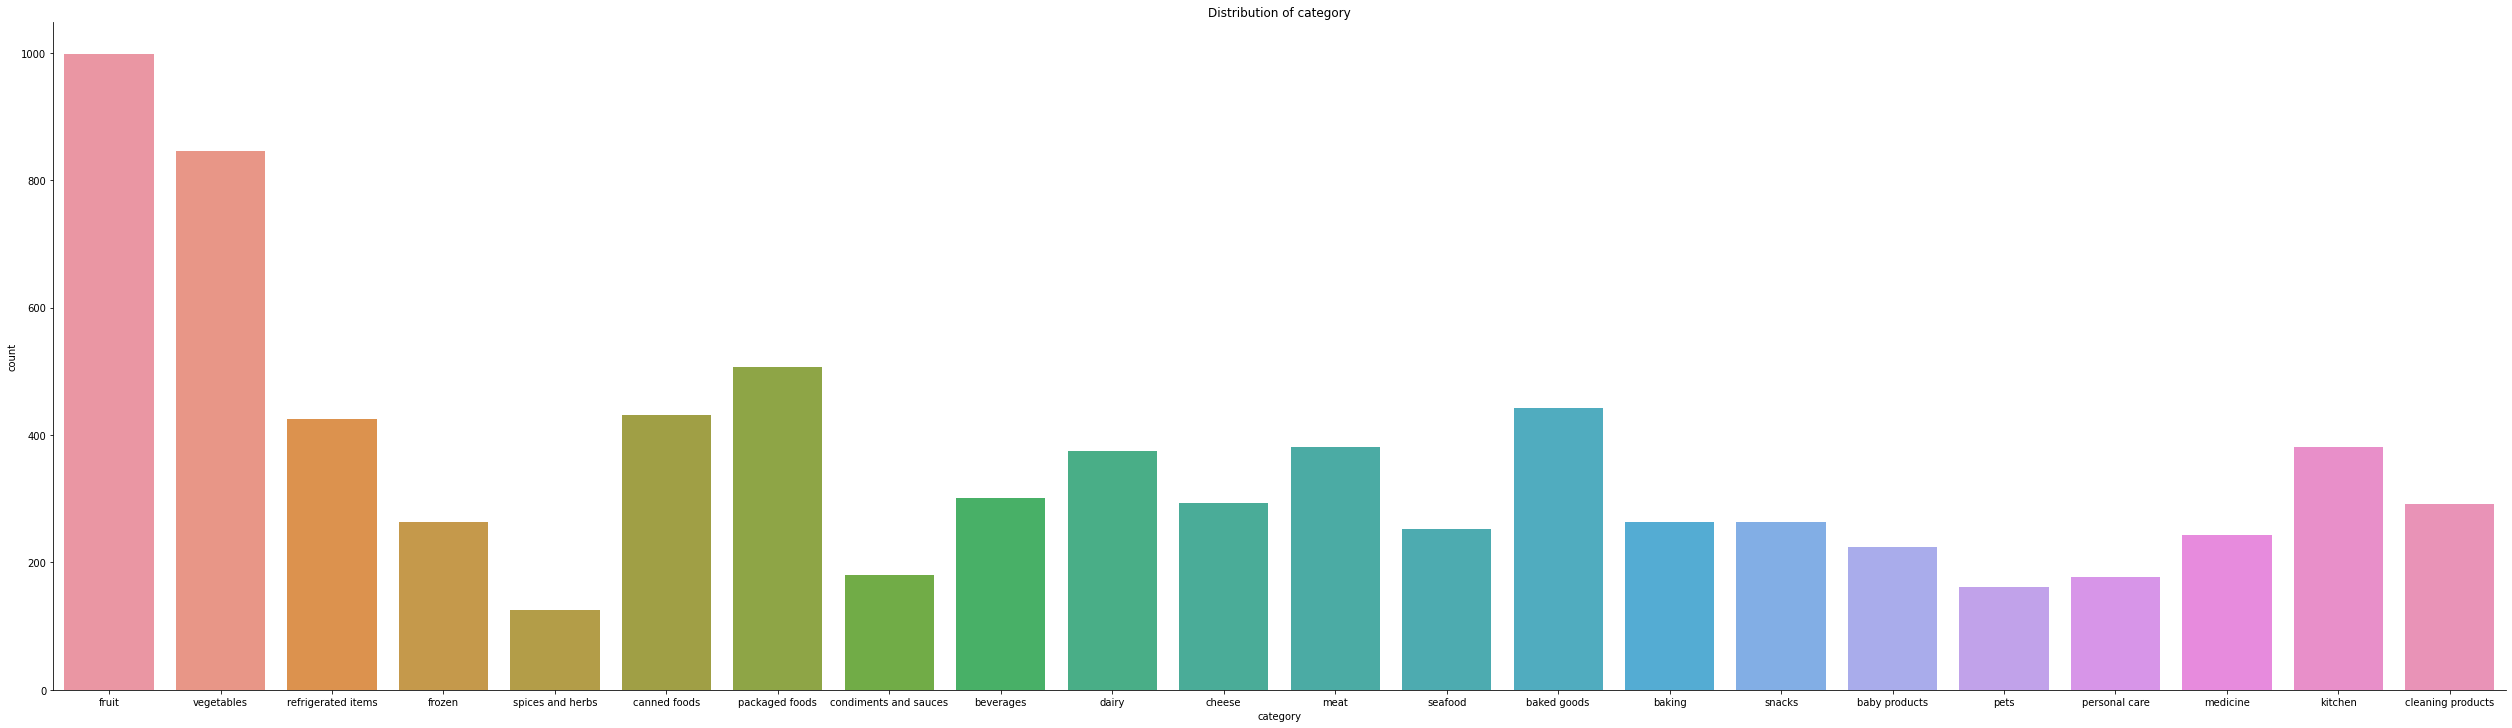

In [14]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [15]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


There are 5 unique values for `customer_type`, and they seem to be evenly distributed. Let's visualise this:

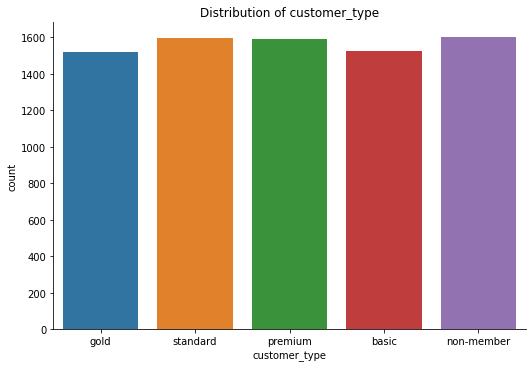

In [16]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

From this sample of data, non-members appear to be the most frequent type of customers, closely followed by standard and premium customers

In [17]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


There are 4 unique values for `payment_type`, and they seem to be quite evenly distributed once again. Let's visualise this:

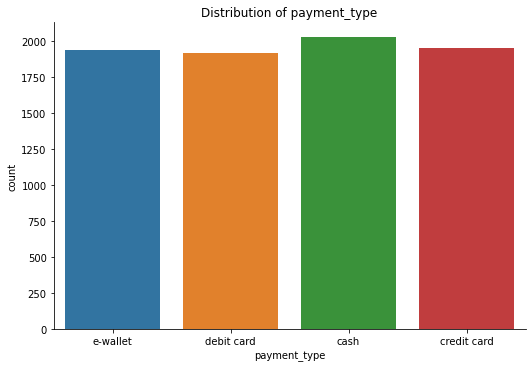

In [18]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

Interestingly, cash seems to be the most frequently used method of payment from this sample of data, with debit cards being the least frequent. 


This dataset is a sample from 1 store across 1 week. So it will be interesting to see if the population sample follows similar patterns.

In [19]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

